In [34]:
 # Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as st

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Baked Data
import sklearn.datasets as dta

In [14]:
# Make a reference to the comic_books_expanded.csv file path
filepath = "Resources/park_data_clean2.csv"

# Import the comic_books_expanded.csv file as a DataFrame
df = pd.read_csv(filepath)

# Check the special characters imported correctly
df.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   national_park     63 non-null     object 
 1   date_established  63 non-null     object 
 2   visitors          63 non-null     int64  
 3   description       63 non-null     object 
 4   state             63 non-null     object 
 5   latitude          63 non-null     float64
 6   longitude         63 non-null     float64
 7   acres             63 non-null     float64
 8   year_established  63 non-null     int64  
 9   us_location       63 non-null     object 
dtypes: float64(3), int64(2), object(5)
memory usage: 5.0+ KB


In [16]:
# Add the linear regression equation and line to plot
x_values = df.acres
y_values = df.visitors

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(rvalue)

y = -0.16x + 1599593.97
-0.12511101661783258


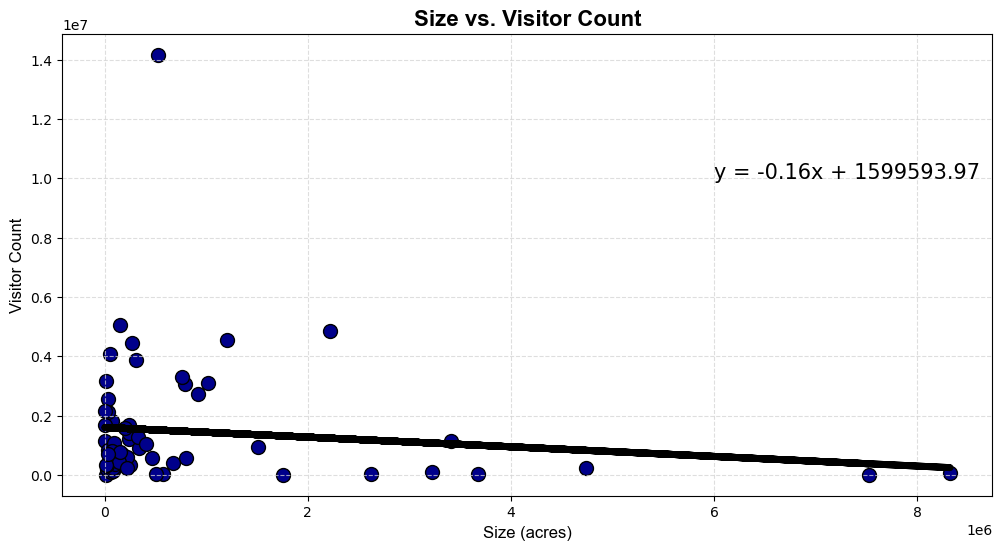

In [17]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.acres, df.visitors, color="darkblue", edgecolor="black", s=100)
plt.plot(df.acres, regress_values, color="black", linewidth=5) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Size (acres)", fontfamily="Arial", fontsize=12)
plt.ylabel("Visitor Count", fontfamily="Arial", fontsize=12)
plt.title("Size vs. Visitor Count", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.annotate(line_eq, (6000000, 10000000), fontsize=15, color="black")


# Show/Save the Graph
plt.show()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [18]:
df.loc[df.visitors>12000000]

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
27,Great Smoky Mountains,1934-06-15,14161548,"The Great Smoky Mountains, part of the Appalac...","North Carolina, Tennessee",35.683333,-83.533333,522426.88,1934,East


In [19]:
df.loc[df.acres>4000000]

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
16,Denali,2017-02-26,229521,"Centered on Denali, the tallest and most promi...",Alaska,63.333333,-150.5,4740911.16,2017,West
19,Gates of the Arctic,1980-12-02,7362,The country's northernmost park protects an ex...,Alaska,67.783333,-153.3,7523897.45,1980,West
59,Wrangell–St. Elias,1980-12-02,50189,The largest national park in the system protec...,Alaska,61.000000,-142.0,8323146.48,1980,West


In [20]:
#Dropping Great Smoky Mountains
df2 = df.loc[df.visitors<12000000]
df2.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [21]:
#Also Dropped big Alaska
df3 = df2.loc[df.acres<4000000]
df3.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [22]:
# Add the linear regression equation and line to plot
x_values = df3.acres
y_values = df3.visitors

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(rvalue)

y = -0.01x + 1322958.25
-0.005031628703678563


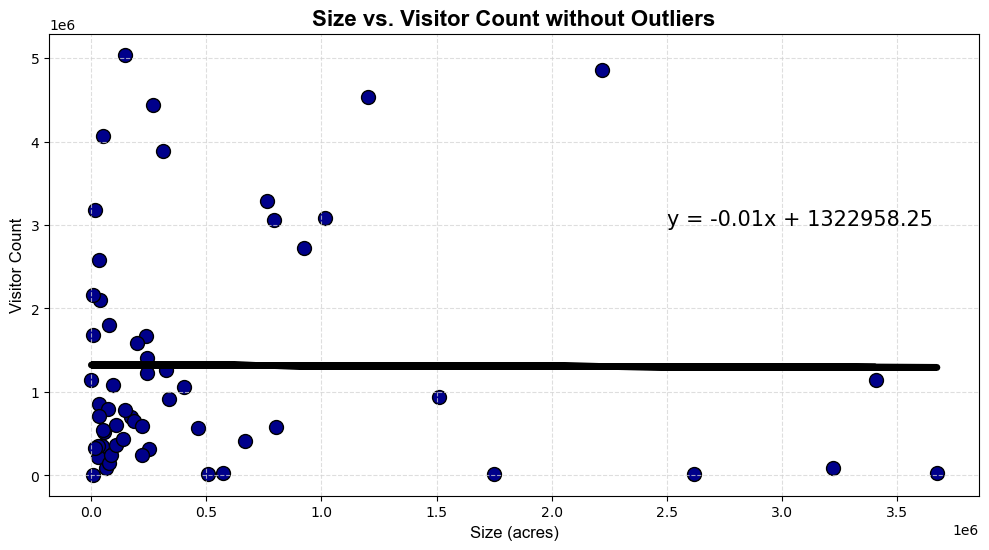

In [27]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df3.acres, df3.visitors, color="darkblue", edgecolor="black", s=100)
plt.plot(df3.acres, regress_values, color="black", linewidth=5) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Size (acres)", fontfamily="Arial", fontsize=12)
plt.ylabel("Visitor Count", fontfamily="Arial", fontsize=12)
plt.title("Size vs. Visitor Count without Outliers", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.annotate(line_eq, (2500000, 3000000), fontsize=15, color="black")

annotation = (10,250)

# Show/Save the Graph
plt.show()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [24]:
#EVEN LESS of a relationship 

In [25]:
#Follow up, biggest parks are in Alaska

In [ ]:
#Most visited park was Great Smoky Mountains 

In [28]:
df.loc[df.longitude>= -90]


,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
5,Biscayne,1980-06-28,705655,"The central part of Biscayne Bay, this mostly ...",Florida,25.650000,-80.083333,172971.11,1980,East
12,Congaree,2003-11-10,215181,"On the Congaree River, this park is the larges...",South Carolina,33.783333,-80.783333,26692.60,2003,East
14,Cuyahoga Valley,2000-10-11,2575275,This park along the Cuyahoga River has waterfa...,Ohio,41.233333,-81.550000,32571.88,2000,East
17,Dry Tortugas,1992-10-26,83817,"The islands of the Dry Tortugas, at the wester...",Florida,24.633333,-82.866667,64701.22,1992,East
18,Everglades,1934-05-30,942130,The Everglades are the largest tropical wilder...,Florida,25.316667,-80.933333,1508938.57,1934,East
27,Great Smoky Mountains,1934-06-15,14161548,"The Great Smoky Mountains, part of the Appalac...","North Carolina, Tennessee",35.683333,-83.533333,522426.88,1934,East
32,Indiana Dunes,2019-02-15,3177210,"Previously designated a national lakeshore, pa...",Indiana,41.650000,-87.050000,15349.08,2019,East
33,Isle Royale,1940-04-03,25844,The largest island in Lake Superior is a place...,Michigan,48.100000,-88.550000,571790.30,1940,East
41,Mammoth Cave,1941-07-01,515774,With more than 400 miles (640 km) of passagewa...,Kentucky,37.183333,-86.100000,54016.29,1941,East


In [29]:
df["us_location"]=df.longitude.apply(lambda x: "East" if x > -90 else "West")
df.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [38]:
# Calculate the visitor mean for the East parks
population1 = df[df["us_location"] == "East"]
population1.visitors.mean()

2313120.230769231

In [39]:
population2 = df[df["us_location"] == "West"]
population2.visitors.mean()

1243625.88

In [35]:
# Calculate Independent (Two Sample) t-test
st.ttest_ind(population1.visitors, population2.visitors, equal_var=False)

TtestResult(statistic=1.0024858646380677, pvalue=0.3345930382425417, df=12.864694047021516)

In [48]:
df5 = df.loc[df.state != "Alaska"]
df5.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,2019-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,2019,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [67]:
# Configure the map plot_4
import hvplot.pandas
map = df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "CartoLight",
    frame_width = 1000,
    frame_height = 700,
    size = "visitors",
    scale = 0.01,
    color = "national_park"
)

# Display the map plot
map



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (national_park,visitors)